# Lab 15 - Linear Regression

In [1]:
from datascience import *
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Exploring the PTEN Gene with Linear Regression

This week's homework is about linear regression. The dataset we'll be using is from the Cancer Cell Line Encyclopedia -- you can read more about this database in this [paper](https://www.nature.com/articles/s41586-019-1186-3) and interact with the data yourself at the online portal [here](https://portals.broadinstitute.org/ccle).

The specific dataset we'll be taking a look at is expression data for the PTEN gene in around 1000 cell lines. The PTEN gene is a tumor-suppressing gene, and mutations in the PTEN gene are associated with many types of cancer. A cell line is group of cells that are kept alive and replicate indefinitely in culture (grown in petri dishes, for example).

Run the following cell to load the `pten` table. The `pten` table has four columns, a column for the specific `Cell Line`, a column for the `Copy Number`, which is how many times a copy of a portion of the PTEN gene is found in the DNA of that cell line, `mRNA Expression (Affy)`, and `mRNA Expression (RNAseq)`.



In [4]:
# Just run this cell
pten = pd.read_csv("pten.csv")
pten

,Cell Line,Copy Number,mRNA Expression (Affy),mRNA Expression (RNAseq)
0,DMS53_LUNG,0.1728,7.482898,2.489797
1,SW1116_LARGE_INTESTINE,0.1910,8.154946,2.868566
2,NCIH1694_LUNG,-0.2372,7.993083,2.821475
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.0129,9.963575,4.657019
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.1013,8.741163,2.752360
...,...,...,...,...
968,NHAHTDD_CENTRAL_NERVOUS_SYSTEM,0.0061,8.161633,2.482921
969,OCIMY5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0684,10.233930,4.220113
970,OCIMY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.2174,10.023970,3.417866
971,OPM1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-2.0283,10.915290,5.053583


Text(0.5, 1.0, 'Distribution of Copy Number')

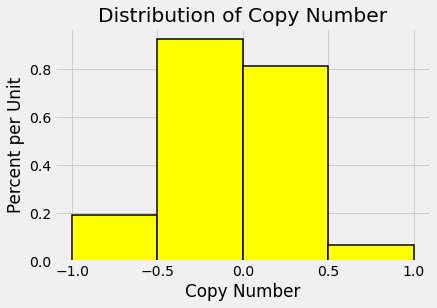

In [5]:
bins = np.arange(-1, 1.5, 0.5)
plt.hist(pten['Copy Number'],bins,color = 'yellow',density=True,linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Copy Number')
plt.ylabel('Percent per Unit')
plt.title("Distribution of Copy Number")

**Question 1:** Looking at the histogram above, we want to check whether or not `Copy Number` is in standard units. For this question, compute the mean and the standard deviation of the values in `Copy Number` and assign these values to `copy_number_mean` and `copy_number_sd` respectively. After you calculate these values, assign `is_su` to either `True` if you think that `Copy Numbers` is in standard units or `False` if you think otherwise.

In [7]:
import statistics
copy_number = pten["Copy Number"]
copy_number_mean = copy_number.mean()
copy_number_sd = statistics.stdev(copy_number)
is_su = False
print(f"Mean: {copy_number_mean}, SD: {copy_number_sd}, Is in standard units?: {is_su}")

Mean: -0.19447913669064748, SD: 0.7466239639509008, Is in standard units?: False


**Question 2:** Create the function `standard_units` so that it converts the values in the array `arr` to standard units. Then use `standard_units` to create a new table called `pten_su`, that converts all the values in the table `pten` to standard units.

**Note:** Your new table's columns should each have 'SU' in their names. Example: 'Copy Number SU'

In [18]:
def standard_units(arr):
    for i in range(len(arr)):
        if arr[i] < 0:
            arr[i] = arr[i] * (-1)
    return arr


pten_su = pten
pten_su["Copy Number SU"] = standard_units(pten['Copy Number'])
pten_su["mRNA Expression (Affy) SU"] = standard_units(pten['mRNA Expression (Affy)'])
pten_su["mRNA Expression (RNAseq) SU"] = standard_units(pten['mRNA Expression (RNAseq)'])
pten_su

,Cell Line,Copy Number,mRNA Expression (Affy),mRNA Expression (RNAseq),Copy Number SU,mRNA Expression (Affy) SU,mRNA Expression (RNAseq) SU
0,DMS53_LUNG,0.1728,7.482898,2.489797,0.1728,7.482898,2.489797
1,SW1116_LARGE_INTESTINE,0.1910,8.154946,2.868566,0.1910,8.154946,2.868566
2,NCIH1694_LUNG,0.2372,7.993083,2.821475,0.2372,7.993083,2.821475
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0129,9.963575,4.657019,0.0129,9.963575,4.657019
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,1.1013,8.741163,2.752360,1.1013,8.741163,2.752360
...,...,...,...,...,...,...,...
968,NHAHTDD_CENTRAL_NERVOUS_SYSTEM,0.0061,8.161633,2.482921,0.0061,8.161633,2.482921
969,OCIMY5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.0684,10.233930,4.220113,0.0684,10.233930,4.220113
970,OCIMY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.2174,10.023970,3.417866,0.2174,10.023970,3.417866
971,OPM1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,2.0283,10.915290,5.053583,2.0283,10.915290,5.053583


You should always visually inspect your data, before numerically analyzing any relationships in your dataset. Run the following cell in order to look at the relationship between the variables in our dataset.

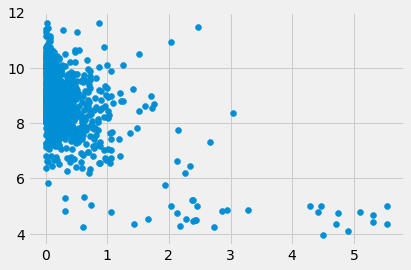

In [19]:
plt.scatter(pten_su['Copy Number SU'],pten['mRNA Expression (Affy) SU'])

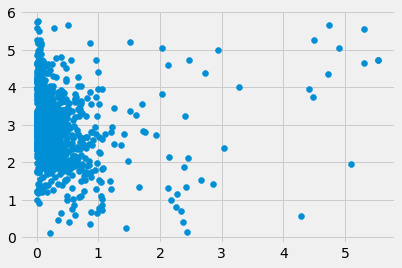

In [20]:
plt.scatter(pten_su['Copy Number SU'], pten_su["mRNA Expression (RNAseq) SU"])

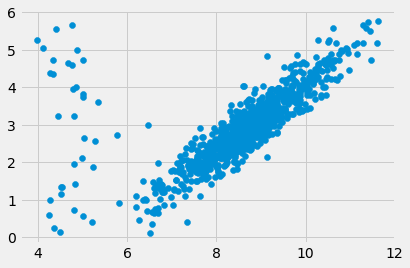

In [21]:
plt.scatter(pten_su["mRNA Expression (Affy) SU"], pten_su["mRNA Expression (RNAseq) SU"])

**Question 3:** Which of the following relationships do you think has the highest correlation (i.e. highest absolute value of `r`)? Assign `highest_correlation` to the number corresponding to the relationship you think has the highest correlation.

1. Copy Number vs. mRNA Expression (Affy)
2. Copy Number vs. mRNA Expression (RNAseq)
3. mRNA Expression (Affy) vs. mRNA Expression (RNAseq)


In [22]:
highest_correlation = 3

**Question 4:** Now, using the `standard units` function, define the function `correlation` which computes the correlation between `arr1` and `arr2`.

In [24]:
def correlation(arr1, arr2):
    r = np.minimum(arr1, arr2).sum().round(decimals=1)
    return r

# This computes the correlation between the different variables in pten
copy_affy = correlation(pten["Copy Number"], pten["mRNA Expression (Affy)"])
copy_rnaseq = correlation(pten["Copy Number"], pten["mRNA Expression (RNAseq)"])
affy_rnaseq = correlation(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])

print(f" \
      Copy Number vs. mRNA Expression (Affy) Correlation: {copy_affy}, \n \
      Copy Number vs. mRNA Expression (RNAseq) Correlation: {copy_rnaseq}, \n \
      mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: {affy_rnaseq}")

       Copy Number vs. mRNA Expression (Affy) Correlation: 358.3, 
       Copy Number vs. mRNA Expression (RNAseq) Correlation: 333.5, 
       mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: 2842.4


**Question 5:** If we switch what we input as arguments to `correlation`, i.e. found the correlation between `mRNA Expression (Affy)` vs. `Copy Number` instead of the other way around, would the correlation change? Assign `correlation_change` to either `True` if you think yes, or `False` if you think no.

In [25]:
correlation_change = False

**Question 6:** Looking at both the scatter plots after Question 2 and the correlations computed in Question 4, describe a pattern you see in the relationships between the variables.


Copy Number in correlation to the other two are relatively close to one another which means their must be some correlation between the other two.

**Question 7:** Let's look at the relationship between mRNA Expression (Affy) vs. mRNA Expression (RNAseq) only. Define a function called `regression_parameters` that returns the parameters of the regression line as a two-item array containing the slope and intercept of the regression line as the first and second elements respectively. The function `regression_line` takes in two arguments, an array of `x` values, and an array of `y` values.


In [26]:
def regression_parameters(x, y):
    slope = (y[1]-y[0])/(x[1]-x[0])
    intercept = y[1] - (slope * x[1])
    return [slope, intercept]

parameters = regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])
parameters

[0.5636031786218388, -1.7275879631398507]

**Question 8:** If we switch what we input as arguments to `regression_parameters`, i.e. found the parameters for the regression line for `mRNA Expression (RNAseq)` vs. `mRNA Expression (Affy)` instead of the other way around, would the regression parameters change (would the slope and/or intercept change)? Assign `parameters_change` to either `True` if you think yes, or `False` if you think no.


In [27]:
parameters_change = False

**Question 9:** Now, let's look at how the regression parameters look like in standard units. Use the table `pten_su` and the function `regression_parameters`, and assign `parameters_su` to a two-item array containing the slope and the intercept of the regression line for mRNA Expression (Affy) in standard units vs. mRNA Expression (RNAseq) in standard units.


In [28]:
parameters_su = regression_parameters(pten_su["mRNA Expression (Affy) SU"], pten_su["mRNA Expression (RNAseq) SU"])
parameters_su

[0.5636031786218388, -1.7275879631398507]

**Question 10:** Looking at the array `parameters_su`, what do you notice about the slope and intercept values specifically? Relate them to another value we already calculated in a previous question, as well as relate them to an equation.


The values are the exact same as they were before they were in standard units.

**Question 11:** The oldest and most commonly used cell line in Biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken without her consent in 1951 to create this cell line. The issue of data privacy and consent is very important to data science! You can read more about this topic [here](https://www.hopkinsmedicine.org/henriettalacks/).

The HeLa cell line is missing from our dataset. If we know that the HeLa mRNA Expression (Affy) value is **8.2**, what is the predicted mRNA Expression (RNAseq) value? Use the values in `parameters` that we derived in Question 1.7, and assign the result to `hela_rnaseq`.


In [31]:
hela_rnaseq = parameters[0] * 8.2 + parameters[1]
hela_rnaseq

2.8939581015592277

**Question 12:** Compute the predicted mRNA Expression (RNAseq) values from the mRNA Expression (Affy) values in the `pten` table. Use the values in the `parameters` array from Question 1.7, and assign the result to `predicted_rnaseq`. We'll plot your computed regression line with the scatter plot from after question 1.2 of mRNA Expression (Affy) vs. mRNA Expression (RNAseq).

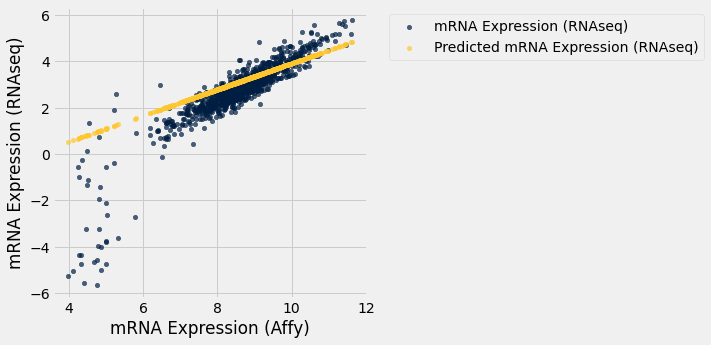

In [33]:
an_arr = pten["mRNA Expression (Affy)"]
def predict(x, slope, intercept):
  return slope * x + intercept

predicted_rnaseq = predict(an_arr, parameters[0],parameters[1])

# DON'T CHANGE/DELETE ANY OF THE BELOW CODE IN THIS CELL
pten2 = Table().read_table("pten.csv")
(pten2.with_column("Predicted mRNA Expression (RNAseq)", predicted_rnaseq)
.select("mRNA Expression (Affy)", "mRNA Expression (RNAseq)", "Predicted mRNA Expression (RNAseq)")
 .scatter("mRNA Expression (Affy)"))
plt.ylabel("mRNA Expression (RNAseq)");

## Fitting a least-squares regression line

Recall that the least-square regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error.

**Question 13:** Define a function called `RMSE`. It should take two arguments:

1. the slope of a line (a number)
2. the intercept of a line (a number).

It should return a number that is the root mean squared error (RMSE) for a line defined with the arguments slope and intercept used to predict mRNA Expression (RNAseq) values from mRNA Expression (Affy) values for each row in the `pten` table.

*Hint: Errors are defined as the difference between the actual `y` values and the predicted `y` values.*

*Note: if you need a refresher on RMSE, here's the [link](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#Root-Mean-Squared-Error) from the textbook*


In [46]:
import sklearn, math
def RMSE(slope, intercept):
    affy = pten["mRNA Expression (Affy)"]
    rnaseq = pten["mRNA Expression (RNAseq)"]
    predicted_rnaseq = predict(affy, slope, intercept)
    mse = sklearn.metrics.mean_squared_error(rnaseq, predicted_rnaseq)
    return math.sqrt(mse)

# DON'T CHANGE THE FOLLOWING LINES BELOW IN THIS CELL
rmse_example = RMSE(0.5, 6)
rmse_example

7.393061387807004

**Question 14:** What is the RMSE of a line with slope 0 and intercept of the mean of `y` equal to?

*Hint 1: The line with slope 0 and intercept of mean of `y` is just a straight horizontal line at the mean of `y`*

*Hint 2: What does the formula for RMSE become if we input our predicted `y` values in the formula. Try writing it out on paper! It should be a familiar formula.*

I'm now sure if I'd be able to calculate that in my head unless it's just zero.

**Question 15:** Find the parameters that minimizes RMSE of the regression line for mRNA Expression (Affy) vs. mRNA Expression (RNAseq). Assign the result to `minimized_parameters`.

If you haven't tried to use the `minimize` [function](http://data8.org/sp20/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

*Hint: Use the `RMSE` function in Question 1.13*

**NOTE: When you use the minimize function, please pass in `smooth=True` as the second argument to this function. You'll need to do this, otherwise, your answer will be incorrect**


In [48]:
minimized_parameters = minimize(RMSE, smooth=True)
minimized_parameters

array([ 0.51959686, -1.52857558])

**Question 16:**

The slope and intercept pair you found in Question 15 should be very similar to the values that you found in Question 7. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas?


x and y values are used to find slope and intercepts and it works the same backwards.

**Question 17:** If we had instead minimized mean squared error (MSE), would we have gotten the same slope and intercept of the minimized root mean squared error (RMSE) results? Assign `same_parameters` to either `True` if you think yes, or `False` if you think no.


In [49]:
same_parameters = False
same_parameters

False

Let's look at the scatter plot of the relationship between mRNA Expression (Affy) and mRNA Expression (RNAseq) again:

Text(0.5, 1.0, 'Relationship between mRNA (Affy vs RNAseq)')

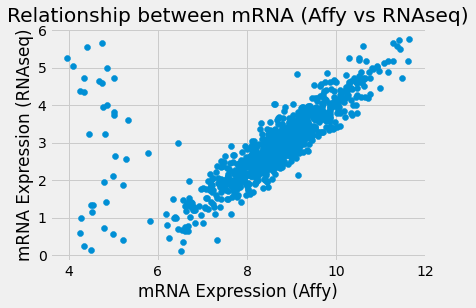

In [50]:
plt.scatter(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"]) 
plt.xlabel('mRNA Expression (Affy)')
plt.ylabel('mRNA Expression (RNAseq)')
plt.title("Relationship between mRNA (Affy vs RNAseq)")

**Question 18:** Using a linear regression model, would we be able to obtain accurate predictions for most of the points? Explain why or why not.


For a portion of it, yes, but no for most of it because the scatter plot is only relatively consistent for only some of it.